In [1]:
import ee
import geopandas
import os
from dotenv import load_dotenv

/Users/clementkm/Documents/School/TOLBI STAGE /PROJECT/DATA_2/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
load_dotenv()
ee.Authenticate()
ee.Initialize(project=os.getenv("ID_NAME_PROJECT_EE"))

In [ ]:
dataset_world = geopandas.read_file(os.getenv("DATASET_PATH_AFRICA"))
dataset_world.shape

In [5]:
dataset_africa = geopandas.read_file(os.getenv("DATASET_PATH_AFRICA"))

In [6]:
dataset_africa.shape

(254361, 21)

In [105]:
df.isnull().sum()

Lat                             0
Lon                             0
Start_Year                      0
End_Year                        0
Dataset_Code                    0
Continent_Code                  0
LC_Confidence             1817034
Segment_Type              1818502
Leaf_Type                 1858129
Impervious_Percent        1870982
Veg_Density               1853929
Tree_Location             1858043
Veg_Modifier              1752206
Level1_Ecoregion                0
Level2_Ecoregion                0
Glance_Class_ID_level1          0
Glance_Class_ID_level2          0
Change                          0
ID                              0
Glance_ID                       0
geometry                        0
dtype: int64

In [132]:
df_african = df[df["Continent_Code"]== 3]
df_african.to_file('df_african.geojson', driver='GeoJSON')

In [107]:
df_african

,Lat,Lon,Start_Year,End_Year,Dataset_Code,Continent_Code,LC_Confidence,Segment_Type,Leaf_Type,Impervious_Percent,...,Tree_Location,Veg_Modifier,Level1_Ecoregion,Level2_Ecoregion,Glance_Class_ID_level1,Glance_Class_ID_level2,Change,ID,Glance_ID,geometry
880772,14.725049,43.144871,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,2,2_00,3,3,False,870424,03_2_00_999_870424_2015_2015,POINT (43.14487 14.72505)
880773,31.652813,44.546241,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870425,03_3_00_999_870425_2015_2015,POINT (44.54624 31.65281)
880774,26.820775,40.302510,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870426,03_3_00_999_870426_2015_2015,POINT (40.30251 26.82077)


In [108]:
df_african["centroid"] = df_african["geometry"].centroid
df_african =df_african.set_geometry("centroid")

/var/folders/32/tnln06y93cs1qk5zp6ywqdnh0000gn/T/ipykernel_13764/2115276327.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_african["centroid"] = df_african["geometry"].centroid


In [109]:
df_afrcain_first = df_african["centroid"].head(1)

points = geopandas.GeoSeries(df_afrcain_first)
points

880772    POINT (43.14487 14.72505)
Name: centroid, dtype: geometry

In [110]:
buffer = points.buffer(25600 , cap_style=3)
buffer

/var/folders/32/tnln06y93cs1qk5zp6ywqdnh0000gn/T/ipykernel_13764/1274873340.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = points.buffer(25600 , cap_style=3)


880772    POLYGON ((25643.14487 25614.72505, 25643.14487...
dtype: geometry

In [111]:
import matplotlib.pyplot as plt

<Axes: >

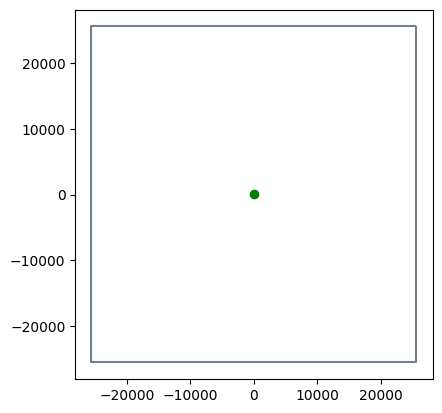

In [112]:
fig, ax1 = plt.subplots()
buffer.boundary.plot(ax=ax1, color = 'slategrey')
points.plot(ax = ax1, color = 'green')

In [151]:
d =df_african[df_african["End_Year"]>=2018]

In [152]:
len(d)

35449

In [144]:
df_african

,Lat,Lon,Start_Year,End_Year,Dataset_Code,Continent_Code,LC_Confidence,Segment_Type,Leaf_Type,Impervious_Percent,...,Tree_Location,Veg_Modifier,Level1_Ecoregion,Level2_Ecoregion,Glance_Class_ID_level1,Glance_Class_ID_level2,Change,ID,Glance_ID,geometry
880772,14.725049,43.144871,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,2,2_00,3,3,False,870424,03_2_00_999_870424_2015_2015,POINT (43.14487 14.72505)
880773,31.652813,44.546241,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870425,03_3_00_999_870425_2015_2015,POINT (44.54624 31.65281)
880774,26.820775,40.302510,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870426,03_3_00_999_870426_2015_2015,POINT (40.30251 26.82077)
880775,32.015824,44.378347,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870427,03_3_00_999_870427_2015_2015,POINT (44.37835 32.01582)
880776,26.317088,44.010757,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,3,3_00,3,3,False,870428,03_3_00_999_870428_2015_2015,POINT (44.01076 26.31709)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874976,39.363861,16.153370,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,22,22_00,3,3,False,1641490,03_22_00_999_1641490_2015_2015,POINT (16.15337 39.36386)
1874977,38.617090,15.862316,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,22,22_00,3,3,False,1641491,03_22_00_999_1641491_2015_2015,POINT (15.86232 38.61709)
1874978,39.873745,16.534975,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,22,22_00,3,3,False,1641492,03_22_00_999_1641492_2015_2015,POINT (16.53498 39.87375)
1874979,40.753646,14.513228,2015,2015,999,3,NaN,NaN,NaN,NaN,...,NaN,None,22,22_00,3,3,False,1641493,03_22_00_999_1641493_2015_2015,POINT (14.51323 40.75365)


<Axes: >

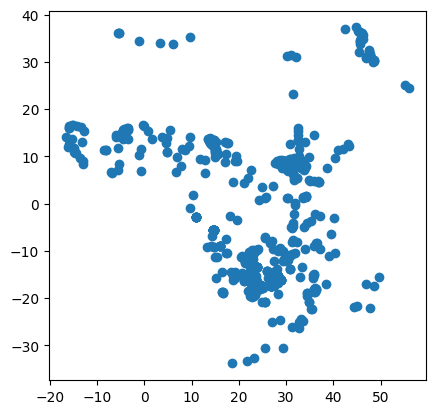

In [160]:
df_african[df_african["End_Year"]>=2019].plot()

In [3]:
import xarray as xr
import pandas as pd

# Create a sample Dataset
data = xr.Dataset({
    'var1': (['x', 'y'], [[1, 2, 3], [4, 5, 6]]),
    'var2': (['x', 'y'], [[7, 8, 9], [10, 11, 12]])
})

# Convert to DataFrame
df = data.to_dataframe().reset_index()

# Save to CSV
df.to_csv('output_file.csv', index=False)